In [73]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [74]:
#Step 1: Generate synthetic data
X,y_true = make_blobs(n_samples=200,centers=3,cluster_std=0.60,random_state=42)
#make_blobs generates data in exactly 2 features

#No scaling, since all features are already on the same scale (e.g., if you generated them 
# synthetically with make_blobs or all are percentages from 0-100).

In [75]:
#Step 2: Apply K-means
kmeans = KMeans(n_clusters=3,random_state=42)
y_kmeans = kmeans.fit_predict(X)

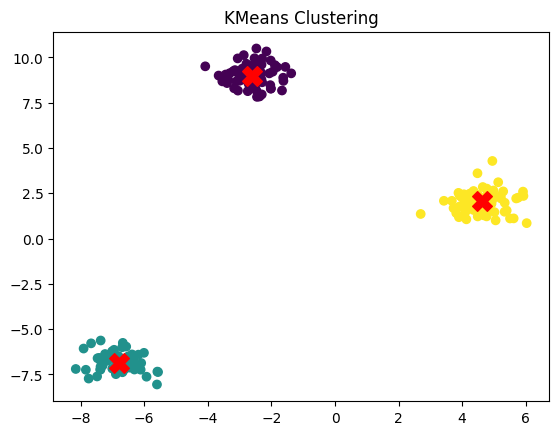

In [76]:
#Step 3: Plot
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker='X')
plt.title('KMeans Clustering')
plt.show()

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [78]:
#1. Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [79]:
#2. Standarize features (important for KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [80]:
#3. Elbow method to choose best k
inertia_values =[]
k_values= range(1,11)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

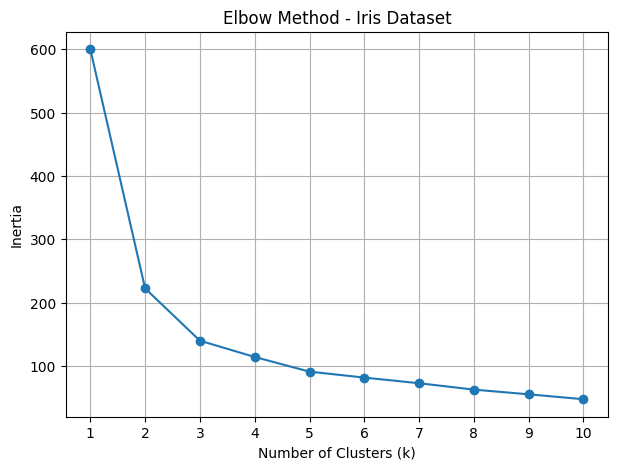

In [81]:
#4. Plot Elbow Curve
plt.figure(figsize=(7,5))
plt.plot(k_values,inertia_values,marker='o')
plt.title('Elbow Method - Iris Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [82]:
#5 Apply KMeans with chosen k (e.g., k=3)
best_k = 3
kmeans = KMeans(n_clusters=best_k,random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
#adding the cluster numbers as a new column named "Cluster" in the original DataFrame
#so each row gets tagged with its own cluster.
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [83]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

In [84]:
#Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [85]:
#Standarize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [86]:
#3. Perform hierarchical clustering using Ward's method
linked = linkage(X_scaled,method='ward')

In [87]:
#4. Assign cluster labels (e.g. cut dendrogram at 3 clusters)
labels = fcluster(linked,t=3,criterion='maxclust')
df['Cluster']=labels

In [88]:
#5. View first few rows with cluster assignments
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [90]:
#1. Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [91]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [92]:
#3. Elbow method to choose best k
inertia_values = []
k_values=range(1,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    kmeans.fit(X_scaled) #still on original 4D data
    inertia_values.append(kmeans.inertia_)

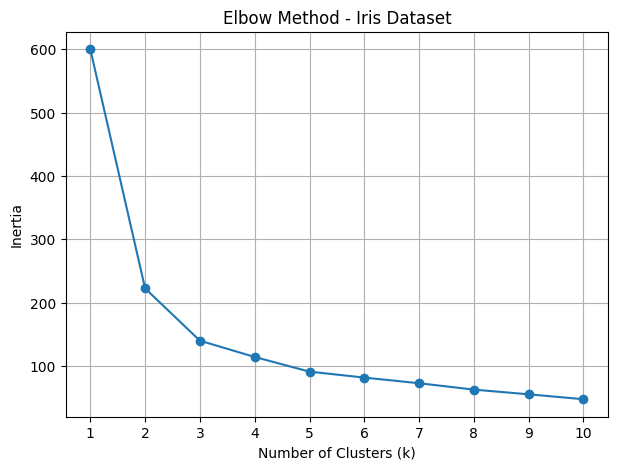

In [93]:
#4. Plot Elbow curve
plt.figure(figsize=(7,5))
plt.plot(k_values,inertia_values,marker='o')
plt.title('Elbow Method - Iris Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [94]:
#5 Apply K-Means with chosen k (e.g.,k=3)
best_k = 3
kmeans=KMeans(n_clusters=best_k,random_state=42,n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled) #cluster labels on original data

In [95]:
#6. Reduce dimensions with PCA for visualization only
pca = PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

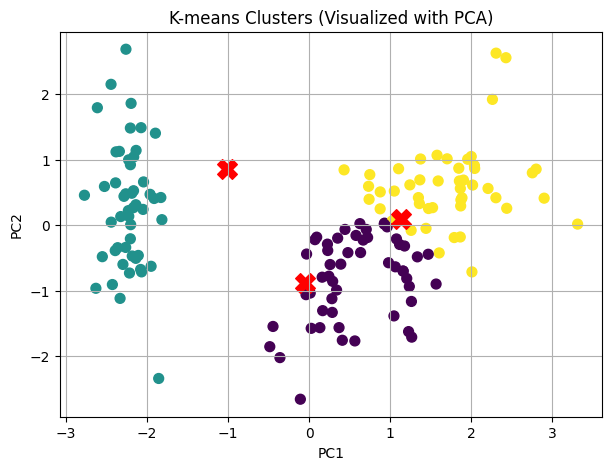

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster       PC1       PC2  
0        1 -2.264703  0.480027  
1        1 -2.080961 -0.674134  
2        1 -2.364229 -0.341908  
3        1 -2.299384 -0.597395  
4        1 -2.389842  0.646835  


In [96]:
#7. Plot clusters in 2D PCA space
plt.figure(figsize=(7,5))
plt.scatter(df['PC1'],df['PC2'],c = df['Cluster'],cmap='viridis',s=50)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',marker='X') #Cluster centers projected in PCA space
plt.title('K-means Clusters (Visualized with PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

print(df.head())

In [97]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage,fcluster,dendrogram
import matplotlib.pyplot as plt


In [98]:
#Load iris dataset
iris=load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [99]:
#Standarize features
scaler=StandardScaler()
X_scaled = scaler.fit_transform(df)

In [100]:
#Reduce dimensions with PCA (2PCs for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

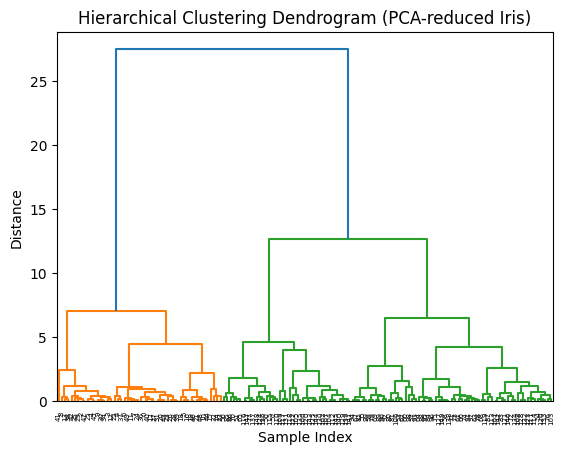

In [102]:
#4. Perform hierarchical clustering using Ward's method
linked=linkage(X_pca,method='ward')
dendrogram(linked,labels=df.index, #or labels=None for default
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (PCA-reduced Iris)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [103]:
#6. Assign cluster labels (cut dendrogram at 3 clusters)
labels=fcluster(linked,t=3,criterion='maxclust')
df['Cluster'] = labels

In [104]:
#7. Optional: add PCs for 2D scatter plot
df['PC1'] = X_pca[:,0]
df['PC2'] = X_pca[:,1]

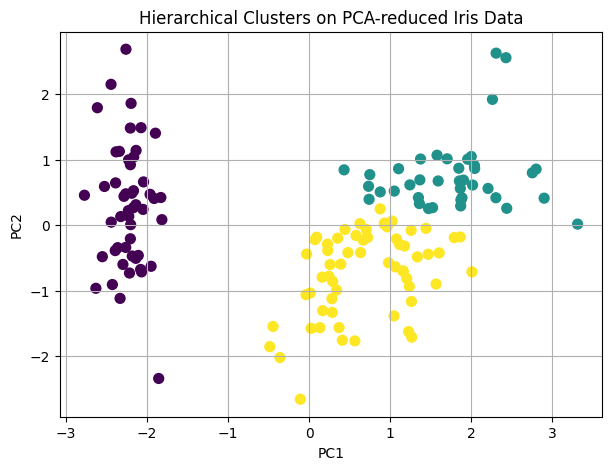

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster       PC1       PC2  
0        1 -2.264703  0.480027  
1        1 -2.080961 -0.674134  
2        1 -2.364229 -0.341908  
3        1 -2.299384 -0.597395  
4        1 -2.389842  0.646835  


In [106]:
#8. Scatter plot to visualize clusters
plt.figure(figsize=(7,5))
plt.scatter(df['PC1'],df['PC2'],c=df['Cluster'],cmap='viridis',s=50)
plt.title('Hierarchical Clusters on PCA-reduced Iris Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()
print(df.head())

In [107]:
#LDA using the Iris Dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [108]:
#Load Iris dataset
iris=load_iris()
X=iris.data #features
y=iris.target #class labels
df = pd.DataFrame(X,columns=iris.feature_names)
df['Species'] = y

In [110]:
#2. Standardize features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [111]:
#3. Apply LDA
#Reduce to 2 linear discrimiants (max C-1=2 for iris)
lda=LDA(n_components=2)
X_lda=lda.fit_transform(X_scaled,y)

In [112]:
#4. Add LDA components to DataFrame for plotting
df['LD1'] = X_lda[:,0]
df['LD2'] = X_lda[:,1]

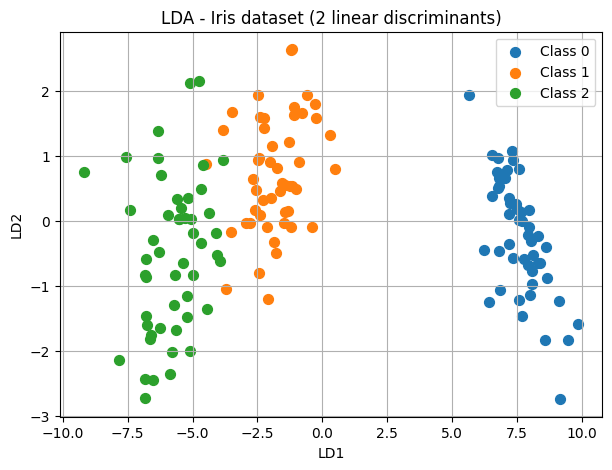

In [113]:
#5. Plot LDA projection
plt.figure(figsize=(7,5))
for label in df['Species'].unique():
    plt.scatter(df[df['Species']==label]['LD1'],df[df['Species']==label]['LD2'],
                label=f"Class {label}",s=50)
plt.title('LDA - Iris dataset (2 linear discriminants)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.grid(True)
plt.show()

In [114]:
#6. View first few rows with LDs
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species       LD1       LD2  
0        0  8.061800 -0.300421  
1        0  7.128688  0.786660  
2        0  7.489828  0.265384  
3        0  6.813201  0.670631  
4        0  8.132309 -0.514463  
